# Notebook du diagramme de Gantt pour la planification de la rédaction du mémoire


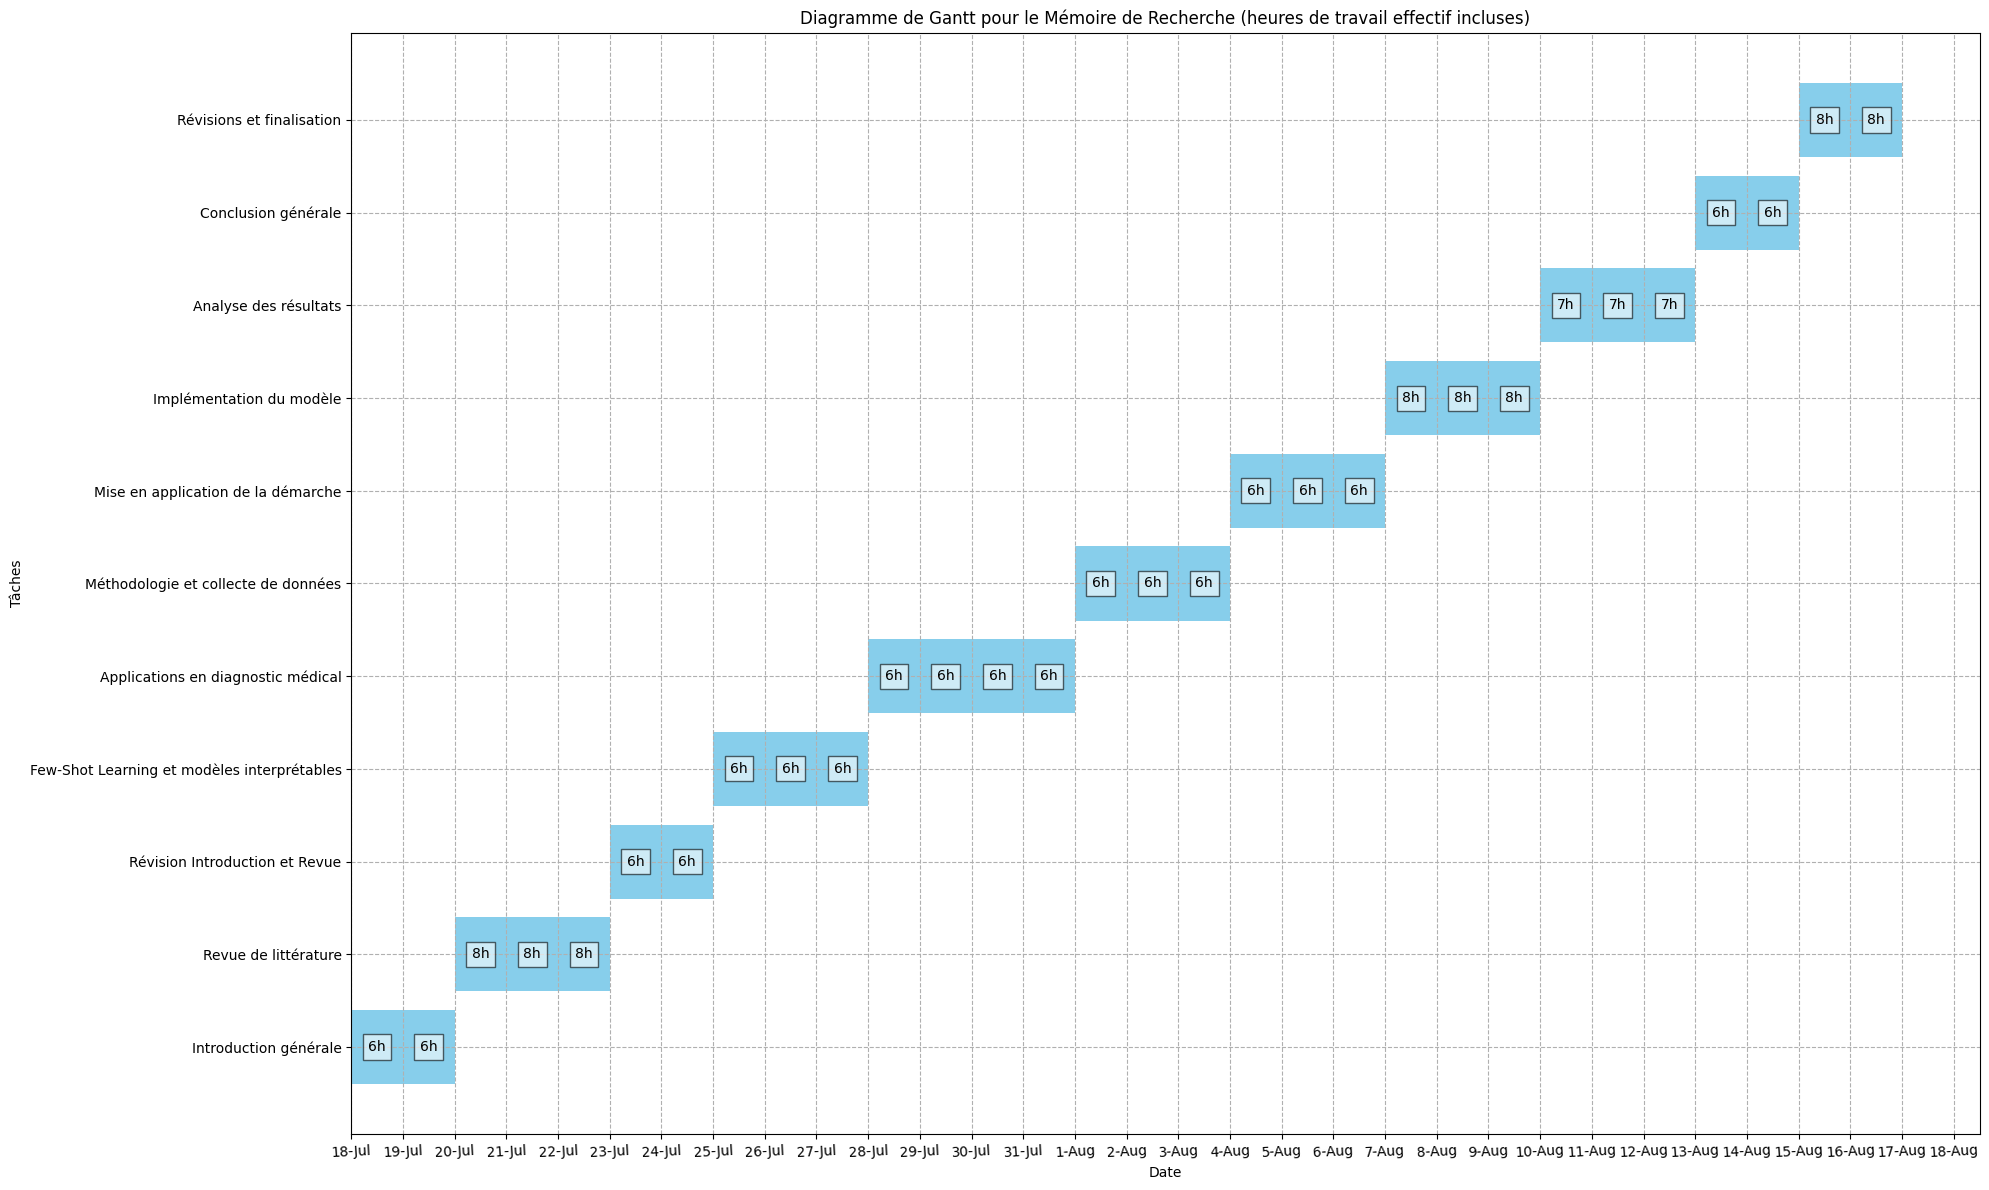

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Define the tasks, their start/end dates, and hours per day
tasks_hours = {
    'Introduction générale': ['2024-07-18', '2024-07-19', 6],
    'Revue de littérature': ['2024-07-20', '2024-07-22', 8],
    'Révision Introduction et Revue': ['2024-07-23', '2024-07-24', 6],
    'Few-Shot Learning et modèles interprétables': ['2024-07-25', '2024-07-27', 6],
    'Applications en diagnostic médical': ['2024-07-28', '2024-07-31', 6],
    'Méthodologie et collecte de données': ['2024-08-01', '2024-08-03', 6],
    'Mise en application de la démarche': ['2024-08-04', '2024-08-06', 6],
    'Implémentation du modèle': ['2024-08-07', '2024-08-09', 8],
    'Analyse des résultats': ['2024-08-10', '2024-08-12', 7],
    'Conclusion générale': ['2024-08-13', '2024-08-14', 6],
    'Révisions et finalisation': ['2024-08-15', '2024-08-16', 8]
}

# Convert to DataFrame
df_hours = pd.DataFrame(tasks_hours).T
df_hours.columns = ['Start', 'End', 'Hours']
df_hours['Start'] = pd.to_datetime(df_hours['Start'])
df_hours['End'] = pd.to_datetime(df_hours['End'])

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12))

# Add the bars with hours labels
for i, (task, row) in enumerate(df_hours.iterrows()):
    ax.barh(task, (row['End'] - row['Start']).days+1, left=row['Start'], color='skyblue')
    for j in range((row['End'] - row['Start']).days + 1):
        ax.text(row['Start'] + pd.Timedelta(days=j+0.5), i, f'{row["Hours"]}h', 
                va='center', ha='center', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

# Format the x-axis to show dates in 'd-M' format
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d-%b'))
plt.xticks(rotation=3)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.8)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Tâches')
ax.set_title('Diagramme de Gantt pour le Mémoire de Recherche (heures de travail effectif incluses)')

# Display the plot
plt.tight_layout()
plt.show()
